### Data Before

In [1]:
import pandas as pd

reports = pd.read_csv('/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/CheXpert-Dataset/df_chexpert_plus_240401.xls')
reports.head(10)

,path_to_image,path_to_dcm,frontal_lateral,ap_pa,deid_patient_id,patient_report_date_order,report,section_narrative,section_clinical_history,section_history,...,section_accession_number,age,sex,race,ethnicity,interpreter_needed,insurance_type,recent_bmi,deceased,split
0,train/patient42142/study5/view1_frontal.jpg,train/patient42142/study5/view1_frontal.dcm,Frontal,AP,patient42142,5,"NARRATIVE:\nChest 1 View, 8-8-2005\n \nHISTORY...","\nChest 1 View, 8-8-2005\n \n",NaN,"61 years Female, ICU patient\n \n",...,\n 9959089\nThis report has been anonymized. A...,62.0,Female,White,Non-Hispanic/Non-Latino,No,Private Insurance,22.2,No,train
1,train/patient42142/study8/view1_frontal.jpg,train/patient42142/study8/view1_frontal.dcm,Frontal,AP,patient42142,8,"NARRATIVE:\nChest 1 View, 7-11-2000\n \nHISTOR...","\nChest 1 View, 7-11-2000\n \n",NaN,"61 years Female, tracheostomy.\n \n",...,\n64048857\nThis report has been anonymized. A...,62.0,Female,White,Non-Hispanic/Non-Latino,No,Private Insurance,22.2,No,train
2,train/patient42142/study2/view1_frontal.jpg,train/patient42142/study2/view1_frontal.dcm,Frontal,AP,patient42142,2,"NARRATIVE:\nChest 1 View, 11-17-2018\n \nHISTO...","\nChest 1 View, 11-17-2018\n \n",NaN,"61 years Female, critical care follow-up\n \n",...,\n#2452\nThis report has been anonymized. All ...,62.0,Female,White,Non-Hispanic/Non-Latino,No,Private Insurance,22.2,No,train
3,train/patient42142/study4/view1_frontal.jpg,train/patient42142/study4/view1_frontal.dcm,Frontal,AP,patient42142,4,NARRATIVE:\nAP PORTABLE UPRIGHT CHEST: May 01 ...,\nAP PORTABLE UPRIGHT CHEST: May 01 at 0518 ho...,ICU protocol. Follow up.\n \n,NaN,...,\n4164064\nThis report has been anonymized. Al...,62.0,Female,White,Non-Hispanic/Non-Latino,No,Private Insurance,22.2,No,train
4,train/patient42142/study3/view1_frontal.jpg,train/patient42142/study3/view1_frontal.dcm,Frontal,AP,patient42142,3,"NARRATIVE:\nEXAM: Chest 1 View, 10/4/2\n \nCLI...","\nEXAM: Chest 1 View, 10/4/2\n \n",61 years Female UPRIGHT PLEASE. ICU PROTOCOL ...,NaN,...,\n49286401\nThis report has been anonymized. A...,62.0,Female,White,Non-Hispanic/Non-Latino,No,Private Insurance,22.2,No,train
5,train/patient42142/study7/view1_frontal.jpg,train/patient42142/study7/view1_frontal.dcm,Frontal,AP,patient42142,7,"NARRATIVE:\nChest 1 View, 1-29-2017\n \nHISTOR...","\nChest 1 View, 1-29-2017\n \n",NaN,"61 years Female, shortness of breath\n \n",...,\n04240392\nThis report has been anonymized. A...,62.0,Female,White,Non-Hispanic/Non-Latino,No,Private Insurance,22.2,No,train
6,train/patient42142/study1/view1_frontal.jpg,train/patient42142/study1/view1_frontal.dcm,Frontal,AP,patient42142,1,"NARRATIVE:\nChest 1 View, 2004/20\n \nHISTORY:...","\nChest 1 View, 2004/20\n \n",NaN,"61 years Female, Line placement\n \n",...,\nljnagnwl\nThis report has been anonymized. A...,62.0,Female,White,Non-Hispanic/Non-Latino,No,Private Insurance,22.2,No,train
7,train/patient42142/study6/view1_frontal.jpg,train/patient42142/study6/view1_frontal.dcm,Frontal,AP,patient42142,6,"NARRATIVE:\nChest 1 View, 1/16/2016\n \nHISTOR...","\nChest 1 View, 1/16/2016\n \n",NaN,"61 years Female, ICU patient\n \n",...,\n36157\nThis report has been anonymized. All ...,62.0,Female,White,Non-Hispanic/Non-Latino,No,Private Insurance,22.2,No,train
8,train/patient04528/study1/view2_lateral.jpg,train/patient04528/study1/view2_lateral.dcm,Lateral,NaN,patient04528,1,NARRATIVE:\nRADIOGRAPHIC EXAMINATION OF THE CH...,\nRADIOGRAPHIC EXAMINATION OF THE CHEST: 6/3/1...,"61 years of age, Female, R o infiltarate..AML...",NaN,...,\nRUFLZXH\nThis report has been anonymized. Al...,62.0,Female,White,Non-Hispanic/Non-Latino,No,Private Insurance,24.9,Yes,train
9,train/patient04528/study1/view1_frontal.jpg,train/patient04528/study1/view1_frontal.dcm,Frontal,PA,patient04528,2,NARRATIVE:\nRADIOGRAPHIC EXAMINATION OF THE CH...,\nRADIOGRAPHIC EXAMINATION OF THE CHEST: 11-28...,"61 years of age, Female, R o infiltarate..AML...",NaN,...,\n716611072\nThis report has

In [2]:
print(reports['report'][0])

NARRATIVE:
Chest 1 View, 8-8-2005
 
HISTORY: 61 years Female, ICU patient
 
COMPARISON: 8/8/2005.
 
IMPRESSION:  
 
1.TRACHEOSTOMY TUBE REMAINS IN PLACE.  RIGHT PICC IS IN STABLE AND 
STANDARD POSITION.  THE ENTERIC TUBE HAS BEEN REMOVED.
 
2.NO EVIDENCE OF PNEUMOTHORAX.  SLIGHTLY IMPROVED AERATION OF THE 
BILATERAL LUNGS WITH NO EVIDENCE OF FOCAL AIR SPACE OPACITIES OR 
PLEURAL EFFUSIONS.
 
 SUMMARY: 2-ABNORMAL, PREVIOUSLY REPORTED  
I have personally reviewed the images for this examination and agreed
with the report transcribed above.
 
ACCESSION NUMBER:
 9959089
This report has been anonymized. All dates are offset from the actual dates by a fixed interval associated with the patient.


### Rename the paths and produce a new CSV

In [2]:
import os
import shutil
import pandas as pd
from tqdm import tqdm

# Define paths
base_dir = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/CheXpert-Dataset/Data/PNG/train"  # Base directory containing patient folders
csv_file = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/CheXpert-Dataset/df_chexpert_plus_240401.xls"  # Update with the actual CSV filename
output_dir = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/Data_new"  # Folder where renamed images will be copied
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Load CSV file
df = pd.read_csv(csv_file)

# Ensure the CSV contains necessary columns
required_columns = {"deid_patient_id", "report", "frontal_lateral", "ap_pa", "age", "sex", "race", "path_to_image"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"CSV is missing required columns: {required_columns - set(df.columns)}")

In [4]:
# Create a new dataframe to store the renamed file info
new_records = []

# Traverse through patient folders
for patient_folder in tqdm(os.listdir(base_dir)):
    patient_path = os.path.join(base_dir, patient_folder)
    if not os.path.isdir(patient_path) or not patient_folder.startswith("patient"):
        continue  # Skip non-directory files or unrelated folders

    patient_number = patient_folder.replace("patient", "")

    for study_folder in os.listdir(patient_path):
        study_path = os.path.join(patient_path, study_folder)
        if not os.path.isdir(study_path) or not study_folder.startswith("study"):
            continue  # Skip non-study folders

        study_number = study_folder.replace("study", "")

        for image_file in os.listdir(study_path):
            if not image_file.endswith(".png"):
                continue  # Skip non-PNG files

            image_path = os.path.join(study_path, image_file)
            actual_path = image_path[image_path.find("train"):]
            actual_path = actual_path.replace('.png', '.jpg')
            # print("actual image path", actual_path)
            # Match file path in CSV
            csv_row = df[df["path_to_image"] == actual_path]

            if csv_row.empty:
                print(f"Warning: No metadata found for {actual_path}")
                continue

            # Extract renaming metadata
            view = csv_row.iloc[0]["frontal_lateral"]  # Frontal or Lateral
            ap_pa = csv_row.iloc[0]["ap_pa"]  # Ap or PA
            age = csv_row.iloc[0]["age"]
            sex = csv_row.iloc[0]["sex"]
            race = csv_row.iloc[0]["race"]
            report = csv_row.iloc[0]["report"]
            section_history = csv_row.iloc[0]["section_history"]
            ethnicity = csv_row.iloc[0]["ethnicity"]
            recent_bmi = csv_row.iloc[0]["recent_bmi"]

            # Generate new filename
            new_filename = f"{patient_number}-{study_number}-{view}-{ap_pa}-{age}-{sex}-{race}.png"
            new_file_path = os.path.join(output_dir, new_filename)

            # Copy and rename the image
            shutil.copy(image_path, new_file_path)

            # Store in CSV record
            new_records.append([new_file_path, patient_number, study_number, view, report, section_history, age, sex, race, ethnicity, recent_bmi])
            
# Create a DataFrame for the new CSV
new_df = pd.DataFrame(new_records, columns=["new-path", "patient-number", "study-number", "view", "reports", "section_history", "age", "sex", "race", "ethnicity", "recent_bmi"])

# Save the new CSV file
new_csv_path = os.path.join(output_dir, "renamed_images.csv")
new_df.to_csv(new_csv_path, index=False)

print(f"✅ Process completed! Renamed images are in {output_dir}")
print(f"✅ Metadata CSV saved at {new_csv_path}")

100%|██████████| 5868/5868 [52:39<00:00,  1.86it/s]  


✅ Process completed! Renamed images are in /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/Data_new
✅ Metadata CSV saved at /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/Data_new/renamed_images.csv


In [6]:
new_df.head()

,new-path,patient-number,study-number,view,reports,section_history,age,sex,race,ethnicity,recent_bmi
0,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,2,Lateral,"NARRATIVE:\nChest 2 Views, 2006, October 26th\...","50 years Male, BMT\n \n",50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8
1,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,2,Frontal,"NARRATIVE:\nChest 2 Views, 5/10/2004\n \nHISTO...","50 years Male, BMT\n \n",50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8
2,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,3,Frontal,"NARRATIVE:\nChest 1 View, December 17\n \nHIST...","50 years Male, Critical care follow-up(ICU)\...",50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8
3,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,4,Frontal,NARRATIVE:\nChest 1 View 2-5-2021\n \nCLINICAL...,NaN,50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8
4,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,1,Frontal,"NARRATIVE:\nChest 1 View, july 2006\n \nHISTOR...","50 years Male, SOB\n \n",50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8


In [13]:
print(new_df['reports'][400])

NARRATIVE:
SINGLE PORTABLE VIEW OF THE CHEST: 7-11-2010
COMPARISON:
JULY 2010
IMPRESSION:
1. INCREASED OPACITY AT BOTH APICES, GREATER ON THE LEFT THAN ON
THE RIGHT PERSISTS. HEMORRHAGE CANNOT BE EXCLUDED.
2. INTERVAL DEVELOPMENT OF A LEFT RETROCARDIAC OPACITY CONSISTENT
WITH ATELECTASIS OR CONSOLIDATION.
3. FRACTURE OF THE RIGHT SCAPULA AND LEFT SECOND AND PROBABLY
LEFT FIRST RIBS ARE AGAIN NOTED.
4. THE ENDOTRACHEAL TUBE UNCHANGED IN POSITION. THE NASOGASTRIC
TUBE IS SEEN GOING BELOW THE LEFT HEMIDIAPHRAGM AND PROBABLY COILED
WITHIN THE STOMACH.
END OF IMPRESSION:
POSSIBLE SIGNIFICANT ABNORMALITY/CHANGE, MAY NEED ACTION.
 
ACCESSION NUMBER:
006249
This report has been anonymized. All dates are offset from the actual dates by a fixed interval associated with the patient.


In [10]:
import pandas as pd 
csv_path = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/Raw_New/renamed_images.csv"
df = pd.read_csv(csv_path)

df.head(5)

,new-path,patient-number,study-number,view,reports,section_history,age,sex,race,ethnicity,recent_bmi
0,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,2,Lateral,"NARRATIVE:\nChest 2 Views, 2006, October 26th\...","50 years Male, BMT\n \n",50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8
1,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,2,Frontal,"NARRATIVE:\nChest 2 Views, 5/10/2004\n \nHISTO...","50 years Male, BMT\n \n",50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8
2,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,3,Frontal,"NARRATIVE:\nChest 1 View, December 17\n \nHIST...","50 years Male, Critical care follow-up(ICU)\...",50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8
3,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,4,Frontal,NARRATIVE:\nChest 1 View 2-5-2021\n \nCLINICAL...,NaN,50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8
4,/cluster/home/ammaa/Downloads/Projects/CheXper...,23148,1,Frontal,"NARRATIVE:\nChest 1 View, july 2006\n \nHISTOR...","50 years Male, SOB\n \n",50.0,Male,Asian,Non-Hispanic/Non-Latino,26.8


In [37]:
import random 
num_of_records = len(df)
index = random.randint(0, num_of_records - 1)
random_report = df['reports'][index]

print(random_report)

NARRATIVE:
PORTABLE CHEST SINGLE VIEW:  6/15/2016 AT 0409 HOURS.
 
 COMPARISON:  6-15-2016.
 
 CLINICAL HISTORY:  ICU follow up.
 
 IMPRESSION: 
 
 1.  INTERVAL REMOVAL OF THE RIGHT IJ SHEATH, REMAINING LINES AND 
TUBES ARE STABLE.
 
 2.  NO CHANGE IN CARDIOPULMONARY STATUS WITH PERSISTENT PULMONARY 
EDEMA, BILATERAL PLEURAL EFFUSIONS, AND BIBASILAR PULMONARY OPACITY.
 
 3.  THE CARDIOMEDIASTINAL SILHOUETTE IS STABLE.
 
 SUMMARY:4-POSSIBLE SIGNIFICANT FINDINGS, MAY NEED ACTION 
 
ACCESSION NUMBER:
58900532
This report has been anonymized. All dates are offset from the actual dates by a fixed interval associated with the patient.


### Create JSONL

In [39]:
import pandas as pd
import re
import json

def extract_findings_impressions(report):
    """
    Extracts 'Findings' and 'Impressions' sections from a given radiology report.
    Removes the section headers and keeps only the textual content.
    """
    findings_pattern = r"FINDINGS:\s*(.*?)(?=(IMPRESSION:|\n[A-Z ]+:|$))"
    impressions_pattern = r"IMPRESSION:\s*(.*?)(?=(\n[A-Z ]+:|$))"

    findings_match = re.search(findings_pattern, report, re.DOTALL | re.IGNORECASE)
    impressions_match = re.search(impressions_pattern, report, re.DOTALL | re.IGNORECASE)

    findings_text = findings_match.group(1).strip() if findings_match else ""
    impressions_text = impressions_match.group(1).strip() if impressions_match else ""

    # Combine the extracted text without headers
    combined_text = f"{findings_text}\n{impressions_text}".strip()

    # Normalize whitespace
    return re.sub(r'\s+', ' ', combined_text)

# Load CSV
input_csv = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/Raw_New/renamed_images.csv"  # Change this to your actual CSV file path
df = pd.read_csv(input_csv)

# Ensure required columns exist
if "reports" not in df.columns or "new-path" not in df.columns:
    raise ValueError("CSV file must contain 'reports' and 'new_path' columns.")

# Process reports
jsonl_data = []
for _, row in df.iterrows():
    report_text = row["reports"]
    image_name = row["new-path"].split("/")[-1]  # Extract image file name
    extracted_text = extract_findings_impressions(report_text)
    
    if extracted_text:  # Ensure there is relevant content
        jsonl_data.append({"image": image_name, "suffix": extracted_text})

# Save to JSONL file
output_jsonl = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/output.jsonl"
with open(output_jsonl, "w", encoding="utf-8") as f:
    for entry in jsonl_data:
        f.write(json.dumps(entry) + "\n")

print(f"Processed {len(jsonl_data)} reports. JSONL file saved as {output_jsonl}.")

Processed 47463 reports. JSONL file saved as /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/output.jsonl.


### Preprocessing

In [41]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/7e/d4/7ebdbd03970677812aac39c869717059dbb71a4cfc033ca6e5221787892c/click-8.1.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 339.8 MB/s eta 0:00:00


### Create JSONL from CSV

In [14]:
import pandas as pd
import re
import json

# Load the CSV file with 'new_path' and 'reports' columns
csv_file = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/Raw_New/renamed_images.csv"  # Update with actual file path
df = pd.read_csv(csv_file)

# Function to extract the Impression section
def extract_impression(text):
    """
    Extracts the impression part from a report.
    The impression starts with "1." and ends when bullet points stop.
    """
    if pd.isna(text):
        return None  # Skip if the report is empty or NaN
    
    # Use regex to find all bullet points (e.g., "1. xyz", "2. xyz", etc.)
    bullet_points = re.findall(r"\d+\.\s[^\n]+", text)
    
    if not bullet_points:
        return None  # No impression found

    # Join the extracted bullet points into a single string
    return " ".join(bullet_points)

# Apply function to extract impressions
df["impression"] = df["reports"].apply(extract_impression)

# Drop rows where no impression was found
df = df.dropna(subset=["impression"])

# Function to extract filename (excluding path and extension)
def extract_filename(path):
    return os.path.splitext(os.path.basename(path))[0]

df["image"] = df["new-path"].apply(extract_filename)

# Create JSONL file
jsonl_file = "extracted_impressions.jsonl"

with open(jsonl_file, "w", encoding="utf-8") as f:
    for _, row in df.iterrows():
        json_line = {
            "image": row["image"],  # Extracted filename
            "prefix": "caption en",
            "suffix": row["impression"]
        }
        f.write(json.dumps(json_line) + "\n")

print(f"✅ JSONL file saved: {jsonl_file}")

✅ JSONL file saved: extracted_impressions.jsonl


### JSON CLEANUP

In [55]:
import json
import re
import jsonlines

# Input and output file paths
input_file = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/output.jsonl"  # Update with your actual file name
output_file = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/cleaned_output.jsonl"

# Function to clean text by removing numbers and special characters
def clean_text(text):
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # Remove special characters except whitespace
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    text = text.lower()
    return text

# Process JSONL file
with jsonlines.open(input_file, "r") as reader, jsonlines.open(output_file, "w") as writer:
    for obj in reader:
        if "suffix" in obj:
            obj["suffix"] = clean_text(obj["suffix"])  # Clean the suffix
        writer.write(obj)  # Save cleaned entry

print(f"✅ Cleaned JSONL file saved as: {output_file}")

✅ Cleaned JSONL file saved as: /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/cleaned_output.jsonl


### Remove duplicated entries

In [56]:
import json

# Input and output JSONL file paths
input_jsonl = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/cleaned_output.jsonl"  # Change to your actual file name
output_jsonl = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/deduplicated_output.jsonl"

# Track unique suffixes
unique_suffixes = set()
deduplicated_data = []

# Read JSONL file and remove duplicates
with open(input_jsonl, "r", encoding="utf-8") as infile:
    for line in infile:
        entry = json.loads(line.strip())
        suffix_text = entry["suffix"]

        if suffix_text not in unique_suffixes:
            unique_suffixes.add(suffix_text)
            deduplicated_data.append(entry)

# Save the deduplicated JSONL file
with open(output_jsonl, "w", encoding="utf-8") as outfile:
    for entry in deduplicated_data:
        outfile.write(json.dumps(entry) + "\n")

print(f"Removed duplicates. Final count: {len(deduplicated_data)} entries. JSONL saved as {output_jsonl}.")

Removed duplicates. Final count: 40268 entries. JSONL saved as /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/deduplicated_output.jsonl.


### Delete images with no associated entries in JSONL

In [57]:
import os
import json

# Define file paths
jsonl_file = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/deduplicated_output.jsonl"  # Change to match your JSONL file
image_folder = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/Raw_New/images"  # Change this to your image folder path

# Step 1: Extract image filenames from JSONL
valid_images = set()
with open(jsonl_file, "r", encoding="utf-8") as infile:
    for line in infile:
        entry = json.loads(line.strip())
        valid_images.add(entry["image"])  # Store valid image names

# Step 2: Traverse the image folder and remove unmatched images
removed_count = 0
for image_file in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_file)

    # Check if the file is an image and if it's not in the valid image set
    if os.path.isfile(image_path) and image_file not in valid_images:
        os.remove(image_path)
        removed_count += 1
        print(f"Removed: {image_file}")

print(f"Cleanup complete. {removed_count} images were deleted.")

Removed: 15801-1-Frontal-AP-85.0-Female-Other.png
Removed: 33622-19-Frontal-PA-76.0-Male-White.png
Removed: 13657-1-Frontal-PA-63.0-Male-White.png
Removed: 15964-11-Frontal-PA-23.0-Male-White.png
Removed: 04898-6-Frontal-PA-57.0-Male-White.png
Removed: 18078-6-Frontal-PA-20.0-Female-Other.png
Removed: 18653-7-Frontal-AP-65.0-Male-Unknown.png
Removed: 44812-1-Frontal-AP-61.0-Female-White.png
Removed: 27977-44-Frontal-PA-42.0-Male-White.png
Removed: 05109-40-Frontal-PA-23.0-Male-Asian.png
Removed: 29045-2-Frontal-PA-58.0-Female-White.png
Removed: 48752-5-Frontal-AP-85.0-Female-White.png
Removed: 14363-2-Frontal-AP-89.0-Female-White.png
Removed: 05687-3-Frontal-PA-50.0-Female-White.png
Removed: 10840-1-Frontal-PA-75.0-Female-White.png
Removed: 17359-1-Frontal-PA-43.0-Female-Black.png
Removed: 02195-12-Frontal-PA-65.0-Male-White.png
Removed: 29435-10-Frontal-AP-76.0-Female-White.png
Removed: 36402-1-Frontal-AP-58.0-Female-Other.png
Removed: 28320-1-Frontal-PA-31.0-Male-Asian.png
Removed: 2

### Delete JSONL entries with no associated images

In [60]:
import os
import json

# Define file paths
jsonl_file = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/deduplicated_output.jsonl"  # Change this to match your JSONL file
image_folder = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/Raw_New/images"  # Change this to your actual image folder
output_jsonl = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/fixed_output.jsonl"  # New JSONL file with only valid entries

# Step 1: Get the list of actual images in the folder
existing_images = set(os.listdir(image_folder))  # List all image files in the directory

# Step 2: Filter the JSONL file to keep only valid entries
valid_entries = []
with open(jsonl_file, "r", encoding="utf-8") as infile:
    for line in infile:
        entry = json.loads(line.strip())
        image_name = entry["image"]
        
        # Check if the image exists in the folder
        if image_name in existing_images:
            valid_entries.append(entry)

# Step 3: Write the cleaned JSONL file
with open(output_jsonl, "w", encoding="utf-8") as outfile:
    for entry in valid_entries:
        outfile.write(json.dumps(entry) + "\n")

print(f"Fixed JSONL file created: {output_jsonl}")
print(f"Original JSONL entries: {len(open(jsonl_file).readlines())}")
print(f"Valid JSONL entries (matching images): {len(valid_entries)}")
print(f"Removed {len(open(jsonl_file).readlines()) - len(valid_entries)} extra JSON entries.")

Fixed JSONL file created: /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/fixed_output.jsonl
Original JSONL entries: 40268
Valid JSONL entries (matching images): 40268
Removed 0 extra JSON entries.


### SPLIT

In [64]:
import os
import json
import jsonlines
import shutil
import random

# Define file paths
jsonl_file = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/deduplicated_output.jsonl"  #  cleaned JSONL file
image_folder = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/Raw_New/images"  # Folder containing images
output_folder = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits"  # Where splits will be stored

# Ensure output directories exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, "train"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "test"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "val"), exist_ok=True)

# Read JSONL data
with jsonlines.open(jsonl_file, "r") as reader:
    data = list(reader)

# Shuffle the data for randomness
random.shuffle(data)

# Split the dataset
total_samples = len(data)
train_split = int(0.7 * total_samples)
test_split = int(0.1 * total_samples)

train_data = data[:train_split]
test_data = data[train_split:train_split + test_split]
val_data = data[train_split + test_split:]

# Function to save JSONL files and copy images
def save_split(data, split_name):
    split_jsonl_path = os.path.join(output_folder, f"{split_name}.jsonl")
    split_image_folder = os.path.join(output_folder, split_name)

    with jsonlines.open(split_jsonl_path, "w") as writer:
        for obj in data:
            writer.write(obj)
            # Copy the corresponding image
            image_name = obj["image"]
            src_image_path = os.path.join(image_folder, image_name)
            dst_image_path = os.path.join(split_image_folder, image_name)
            if os.path.exists(src_image_path):  # Ensure the image exists
                shutil.copy(src_image_path, dst_image_path)

# Save each split
save_split(train_data, "train")
save_split(test_data, "test")
save_split(val_data, "val")

print(f"✅ Splitting completed! Data saved in {output_folder}/train, test, val")

✅ Splitting completed! Data saved in /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/train, test, val


### Further Cleanup to remove empty entries and remove corresponding images. 

In [ ]:
import os
import jsonlines
from tqdm import tqdm

# Define dataset paths
datasets = {
    "train": {"jsonl": "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/train.jsonl", "folder": "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/train"},
    "val": {"jsonl": "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/val.jsonl", "folder": "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/val"},
    "test": {"jsonl": "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/test.jsonl", "folder": "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/test"},
}

def clean_dataset(jsonl_file, image_folder):
    """
    1. Removes entries with empty captions in JSONL.
    2. Deletes corresponding images of removed entries.
    3. Deletes any extra images in the folder that have no JSONL entry.
    """

    cleaned_data = []
    removed_entries = 0
    json_image_set = set()
    i = 0

    # Step 1: Read JSONL file & filter out empty captions
    with jsonlines.open(jsonl_file, "r") as reader:
        data = list(reader)

    for entry in tqdm(data, desc=f"Processing {jsonl_file}"):
        if entry["suffix"].strip():  # Keep only non-empty captions
            cleaned_data.append(entry)
            json_image_set.add(entry["image"] + ".png")  # Store valid image names
        else:
            # Remove associated image
            print(removed_entries)
            image_path = os.path.join(image_folder, entry["image"] + ".png")
            if os.path.exists(image_path):
                os.remove(image_path)
                removed_entries += 1

    # Step 2: Save cleaned JSONL file
    cleaned_jsonl = jsonl_file.replace(".jsonl", "_cleaned.jsonl")
    with jsonlines.open(cleaned_jsonl, "w") as writer:
        writer.write_all(cleaned_data)

    print(f"{jsonl_file}: Removed {removed_entries} entries with empty captions. Cleaned file saved as {cleaned_jsonl}")

    # Step 3: Delete images not present in JSONL
    all_image_files = set(os.listdir(image_folder))
    extra_images = all_image_files - json_image_set  # Images without JSONL entries

    for extra_image in tqdm(extra_images, desc=f"Deleting extra images from {image_folder}"):
        os.remove(os.path.join(image_folder, extra_image))

    print(f"{image_folder}: Removed {len(extra_images)} extra images that had no entry in {jsonl_file}.")

# Apply cleaning process to all datasets
for dataset_name, paths in datasets.items():
    clean_dataset(paths["jsonl"], paths["folder"])

print("Cleaning process completed!")

In [9]:
import os
import jsonlines
import re
from tqdm import tqdm

# Remove NO, FINDINGS, IMPRESSION, COMPARISON
def remove_exact_no_entries(jsonl_file, image_folder):
    """
    Removes entries where 'suffix' contains only the word 'NO' (case-insensitive) 
    and deletes the corresponding images.
    """
    cleaned_data = []
    removed_entries = 0

    # ✅ Read JSONL file
    with jsonlines.open(jsonl_file, "r") as reader:
        data = list(reader)

    for entry in tqdm(data, desc=f"Processing {jsonl_file}"):
        # ✅ Remove if 'suffix' is exactly "NO" (ignoring case and extra spaces)
        if not re.fullmatch(r'\s*FINDINGS\s*', entry["suffix"], re.IGNORECASE):  
            cleaned_data.append(entry)
        else:
            # ✅ Remove associated image
            image_path = os.path.join(image_folder, entry["image"] + ".png")
            if os.path.exists(image_path):
                os.remove(image_path)
                removed_entries += 1

    # ✅ Save cleaned JSONL file
    cleaned_jsonl = jsonl_file.replace(".jsonl", "_cleaned.jsonl")
    with jsonlines.open(cleaned_jsonl, "w") as writer:
        writer.write_all(cleaned_data)

    print(f"✅ {jsonl_file}: Removed {removed_entries} entries where 'suffix' was exactly 'NO'. Cleaned file saved as {cleaned_jsonl}")

remove_exact_no_entries("/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/train.jsonl", "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/train")
remove_exact_no_entries("/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/val.jsonl", "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/val")
remove_exact_no_entries("/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/test.jsonl", "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/test")

Processing /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/train.jsonl: 100%|██████████| 23912/23912 [00:00<00:00, 952606.26it/s]


✅ /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/train.jsonl: Removed 0 entries where 'suffix' was exactly 'NO'. Cleaned file saved as /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/train_cleaned.jsonl


Processing /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/val.jsonl: 100%|██████████| 6875/6875 [00:00<00:00, 1032210.77it/s]


✅ /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/val.jsonl: Removed 0 entries where 'suffix' was exactly 'NO'. Cleaned file saved as /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/val_cleaned.jsonl


Processing /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/test.jsonl: 100%|██████████| 3419/3419 [00:00<00:00, 1129337.33it/s]

✅ /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/test.jsonl: Removed 0 entries where 'suffix' was exactly 'NO'. Cleaned file saved as /cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/test_cleaned.jsonl


In [22]:
import os
import torch
import jsonlines
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import BlipForConditionalGeneration, BlipProcessor, Blip2ForConditionalGeneration, AutoProcessor
from torch.optim import AdamW
from transformers import get_scheduler
from peft import LoraConfig, get_peft_model

# Use Mixed Precision (AMP) to save memory
scaler = torch.cuda.amp.GradScaler()

# Load BLIP model
# model_name = "Salesforce/blip2-opt-2.7b"
# device = "cuda" if torch.cuda.is_available() else "cpu"
# processor = BlipProcessor.from_pretrained(model_name)
# model = BlipForConditionalGeneration.from_pretrained("ybelkada/blip2-opt-2.7b-fp16-sharded").to(device)

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("ybelkada/blip2-opt-2.7b-fp16-sharded", load_in_8bit=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# Let's define the LoraConfig
config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    target_modules=["q_proj", "k_proj"]
)

# Apply LoRA
model = get_peft_model(model, config)
model.print_trainable_parameters()

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now default to True since model is quantized.
Loading checkpoint shards: 100%|██████████| 8/8 [00:37<00:00,  4.72s/it]


trainable params: 5,242,880 || all params: 3,749,922,816 || trainable%: 0.1398


In [15]:
import matplotlib.pyplot as plt
import torch
from PIL import Image

# ✅ Function to Generate Caption and Display Image
def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    
    # ✅ Save Original Image for Display
    original_image = image.copy()
    
    # ✅ Apply Transformations for Model Input
    image = transform(image).unsqueeze(0).to(device)

    # ✅ Generate Caption
    with torch.no_grad():
        generated_ids = model.generate(pixel_values=image, max_new_tokens=50)
    caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # ✅ Plot Image with Caption
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image)
    plt.axis("off")
    plt.title(caption, fontsize=12, wrap=True)
    plt.show()
    
    return caption

Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


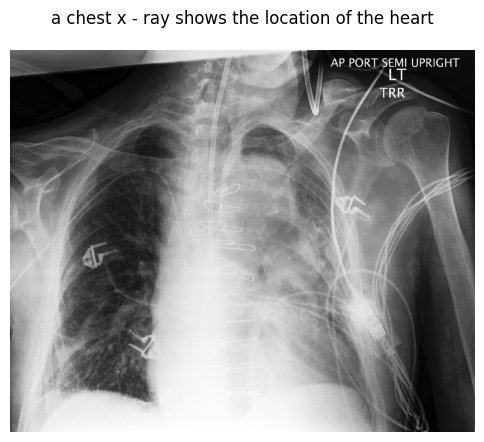

Generated Caption: a chest x - ray shows the location of the heart



In [25]:
import random 

root_dir = "/cluster/home/ammaa/Downloads/Projects/CheXpert-Report-Generation/dataset_splits/test"

test_dir = os.listdir(root_dir)
num_of_images = len(test_dir)

index = random.randint(0, num_of_images)
# Test on a new image
test_image = os.path.join(root_dir, test_dir[index])
print("Generated Caption:", generate_caption(test_image))